In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [43]:
df = pd.read_csv('SSC Result in Bangladesh (2001-2025).csv')

In [44]:
df.head()

,Year,Total_Examinees,Pass_Rate,GPA_5_Count
0,2001,Null,35.22%,76
1,2002,"7,84,815",42.18%,327
2,2003,"921,024",36.85%,"1,389"
3,2004,"756,387",50.27%,"8,597"
4,2005,"944,015",54.10%,"15,631"


In [45]:
df.tail()

,Year,Total_Examinees,Pass_Rate,GPA_5_Count
20,2021,"2,024,192",93.58%,"1,83,340"
21,2022,"2,024,192",87.44%,"2,69,602"
22,2023,"2,041,450",80.39%,"1,83,578"
23,2024,"2,024,192",83.04%,"1,82,129"
24,2025,"1,928,970",68.45%,"1,39,032"


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             25 non-null     int64 
 1   Total_Examinees  25 non-null     object
 2   Pass_Rate        25 non-null     object
 3   GPA_5_Count      25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [47]:
df.describe()

,Year
count,25.000000
mean,2013.000000
std,7.359801
min,2001.000000
25%,2007.000000
50%,2013.000000
75%,2019.000000
max,2025.000000


In [48]:
df.dtypes

,0
Year,int64
Total_Examinees,object
Pass_Rate,object
GPA_5_Count,object


In [49]:
df.shape

(25, 4)

In [50]:
df.isnull().sum()

,0
Year,0
Total_Examinees,0
Pass_Rate,0
GPA_5_Count,0


In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.columns

Index(['Year', 'Total_Examinees', 'Pass_Rate', 'GPA_5_Count'], dtype='object')

## Data visualizations

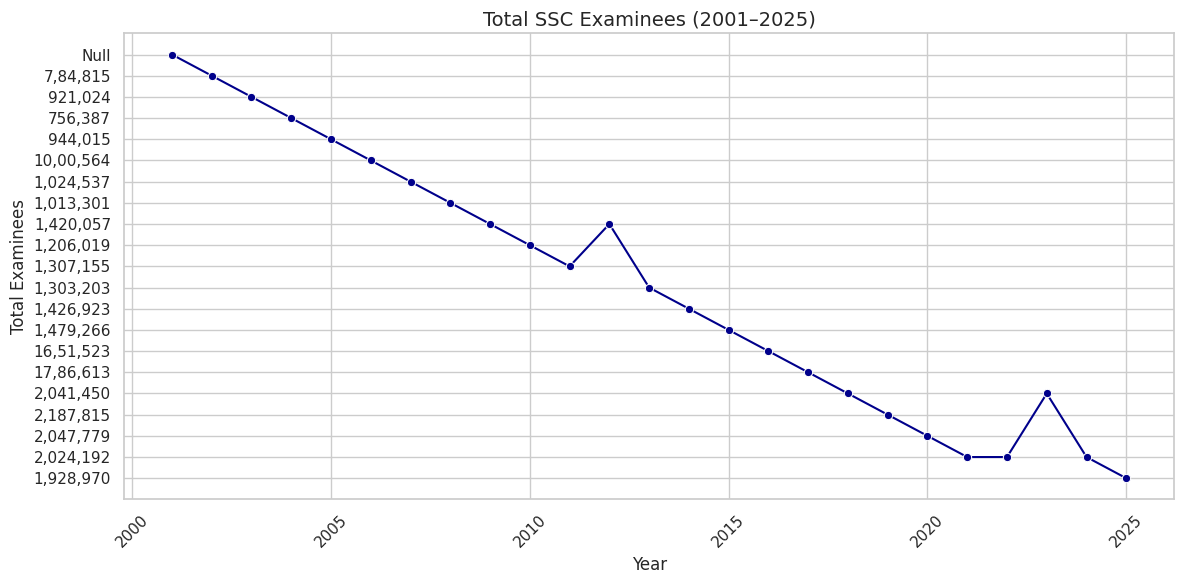

In [53]:
df['Year'] = df['Year'].astype(int)
df = df.sort_values('Year')

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# 1. Total Examinees Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Total_Examinees', marker='o', color='darkblue')
plt.title('Total SSC Examinees (2001–2025)', fontsize=14)
plt.ylabel('Total Examinees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

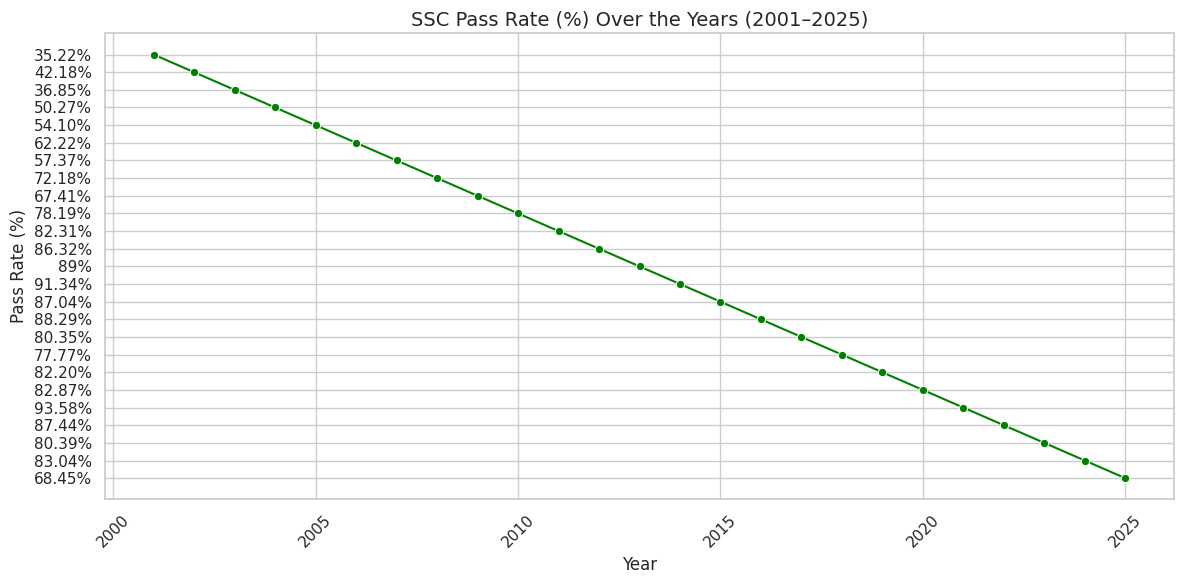

In [54]:
# 2. Pass Rate Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Pass_Rate', marker='o', color='green')
plt.title('SSC Pass Rate (%) Over the Years (2001–2025)', fontsize=14)
plt.ylabel('Pass Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

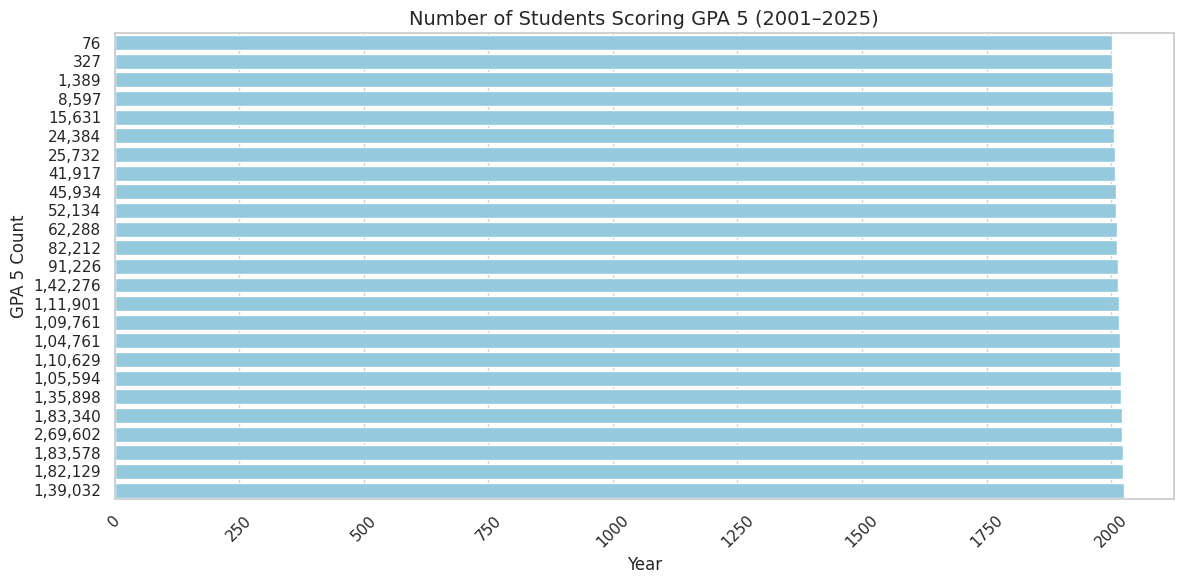

In [55]:
# 3. GPA 5 Count Over the Years
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Year', y='GPA_5_Count', color='skyblue')
plt.title('Number of Students Scoring GPA 5 (2001–2025)', fontsize=14)
plt.ylabel('GPA 5 Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

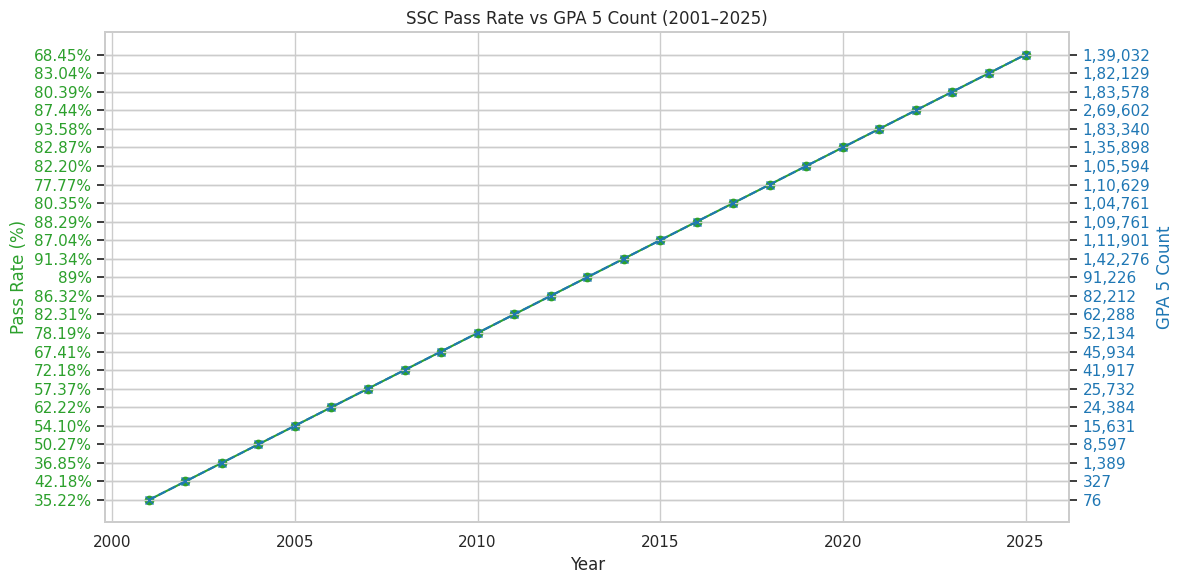

In [56]:
# 4. Combined Visualization: Dual Axis Plot for Pass Rate & GPA 5 Count
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:green'
ax1.set_xlabel('Year')
ax1.set_ylabel('Pass Rate (%)', color=color)
ax1.plot(df['Year'], df['Pass_Rate'], color=color, marker='o', label='Pass Rate')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('GPA 5 Count', color=color)
ax2.plot(df['Year'], df['GPA_5_Count'], color=color, marker='x', linestyle='--', label='GPA 5 Count')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('SSC Pass Rate vs GPA 5 Count (2001–2025)')
fig.tight_layout()
plt.show()

## Predictive modeling

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [58]:
# Sample Dataset (replace this with actual dataset)
data = {
    'Year': list(range(2001, 2026)),
    'Total_Examinees': [2_000_000 + i*50_000 for i in range(25)],
    'Pass_Rate': [70 + i*0.5 for i in range(25)],
    'GPA_5_Count': [50_000 + i*5_000 for i in range(25)]
}
df = pd.DataFrame(data)

# Create binary target: 1 if GPA_5_Count is above average, else 0
avg_gpa5 = df['GPA_5_Count'].mean()
df['High_GPA5'] = (df['GPA_5_Count'] > avg_gpa5).astype(int)

# Features and Target
X = df[['Year', 'Total_Examinees', 'Pass_Rate']]
y = df['High_GPA5']

# Feature Scaling (important for distance-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Store accuracy results
results = {}


In [59]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
results['Logistic Regression'] = accuracy_score(y_test, lr.predict(X_test)) * 100

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
results['Decision Tree'] = accuracy_score(y_test, dt.predict(X_test)) * 100

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
results['Random Forest'] = accuracy_score(y_test, rf.predict(X_test)) * 100

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
results['Support Vector Machine'] = accuracy_score(y_test, svm.predict(X_test)) * 100

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
results['Naive Bayes'] = accuracy_score(y_test, nb.predict(X_test)) * 100

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
results['K-Nearest Neighbors'] = accuracy_score(y_test, knn.predict(X_test)) * 100

# Show Results
print("Model Accuracy Scores (on Test Set):")
for model, score in results.items():
    print(f"{model}: {score:.2f}%")

Model Accuracy Scores (on Test Set):
Logistic Regression: 100.00%
Decision Tree: 100.00%
Random Forest: 100.00%
Support Vector Machine: 100.00%
Naive Bayes: 100.00%
K-Nearest Neighbors: 100.00%


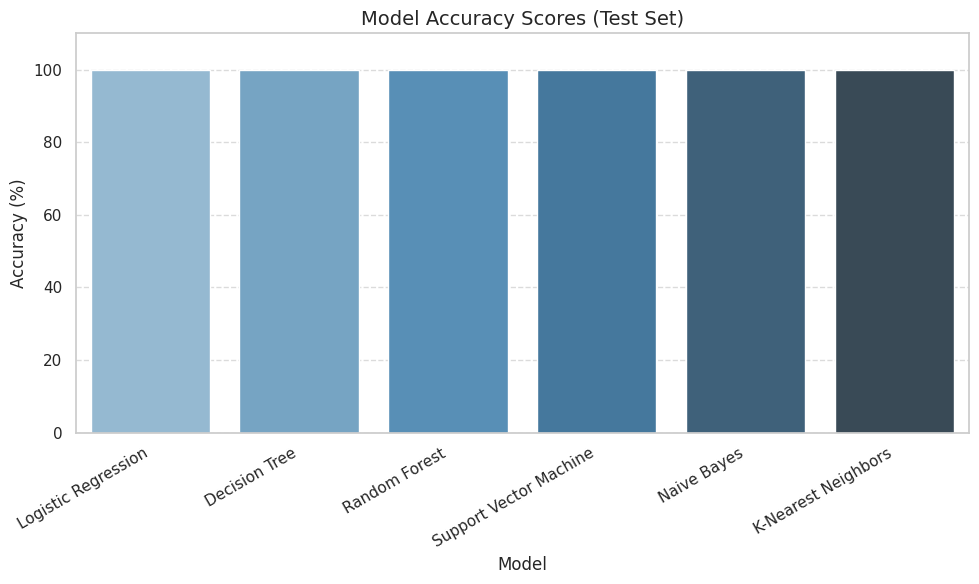

In [60]:
# Accuracy results (from your output)
results = {
    'Logistic Regression': 100.00,
    'Decision Tree': 100.00,
    'Random Forest': 100.00,
    'Support Vector Machine': 100.00,
    'Naive Bayes': 100.00,
    'K-Nearest Neighbors': 100.00
}

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='Blues_d')
plt.ylim(0, 110)
plt.title('Model Accuracy Scores (Test Set)', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()